<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/DL_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import files
uploaded = files.upload()


###PART-1: Revision Classification

In [ ]:
#loading data
from sklearn.datasets import load_breast_cancer


In [ ]:
data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
type(data)
data.keys()
data.data.shape #(samples, features)

(569, 30)

In [ ]:
data.target #0...k-1 target

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target)

#samples in train set
N,d = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler #every element in the column with 0 mean and variance 1, before spltting.
scaler = StandardScaler()
# fit_tranform does fitting and tranforming at the same time
X_train = scaler.fit_transform(X_train) #fit_tranform -> find parameters (mean and std) since it depicts the working of the model.
X_test = scaler.transform(X_test)


In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(d,)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# #alternative
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(d,), activation='sigmoid'))


In [ ]:
#compiling -
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)



Epoch 1/100
14/14 [==============================] - 2s 41ms/step - loss: 0.9077 - accuracy: 0.3873 - val_loss: 0.9035 - val_accuracy: 0.4406
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7969 - accuracy: 0.4812 - val_loss: 0.8086 - val_accuracy: 0.4895
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.7032 - accuracy: 0.5681 - val_loss: 0.7273 - val_accuracy: 0.5874
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6244 - accuracy: 0.6761 - val_loss: 0.6577 - val_accuracy: 0.6434
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5563 - accuracy: 0.7394 - val_loss: 0.5999 - val_accuracy: 0.6993
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.5015 - accuracy: 0.7793 - val_loss: 0.5500 - val_accuracy: 0.7552
Epoch 7/100
14/14 [==============================] - 0s 14ms/step - loss: 0.4562 - accuracy: 0.8099 - val_loss: 0.5074 - val_accuracy: 0.7972
Epoch 8/

In [ ]:

print("Training score: " , model.evaluate(X_train, Y_train))
print("Testing score: " , model.evaluate(X_test, Y_test))


14/14 [==============================] - 0s 6ms/step - loss: 0.0880 - accuracy: 0.9765
Training score:  [0.08796581625938416, 0.9765258431434631]
5/5 [==============================] - 0s 5ms/step - loss: 0.1218 - accuracy: 0.9580
Testing score:  [0.12177818268537521, 0.9580419659614563]


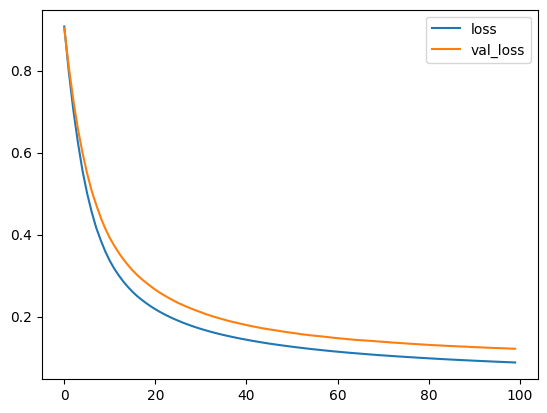

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


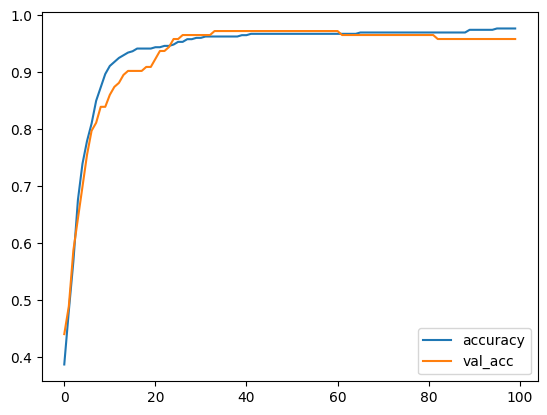

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


###PART-2: Revision Regression

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-08-04 13:27:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-08-04 13:27:31 (33.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
!ls

moore.csv  sample_data


In [ ]:
#load the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
X = data[:, 0].reshape(-1, 1)  #-1 is a wildcard -> put there whatever is left because X is a 2d array (N,d - matrix)
Y = data[:,1]

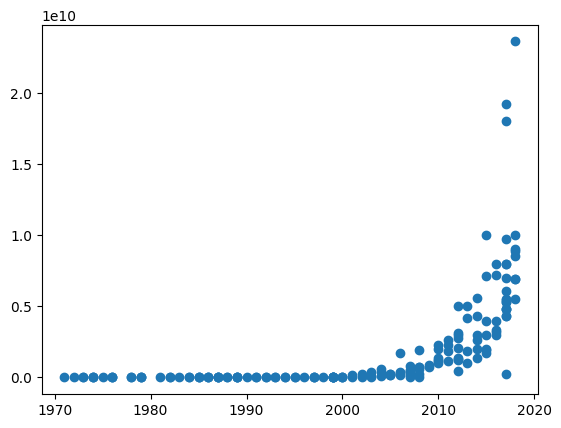

In [ ]:
#Plot data
plt.scatter(X,Y)

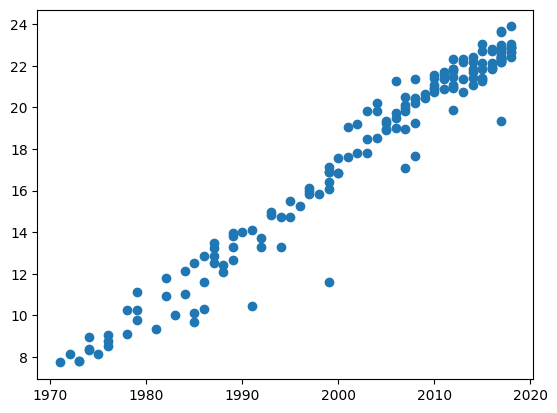

In [ ]:
#linear model
Y= np.log(Y)
plt.scatter(X,Y)

In [ ]:
X = X - X.mean() #translating the data, (scaling)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),

])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9),   # (learning rate , momentum)
    loss = 'mse',
)

In [ ]:
def scheduler(epoch, lr):
  if epoch >=50:
    return 0.0001
  else:
    return 0.001


schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#train the model
r = model.fit(X,Y, epochs = 200, callbacks = [schedule] )

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 501.4649 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 472.5176 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 263.8104 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 347.8970 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 365.0665 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 274.5500 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 187.4280 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 97.2744 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 56.9818 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 37.9485 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 

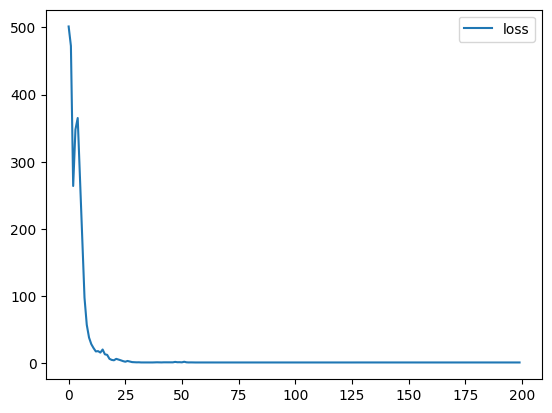

In [ ]:
#plot the loss
plt.plot(r.history['loss'], label = 'loss')
plt.legend();

In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[0.33428365]], dtype=float32), array([17.749022], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]
#rate of growth
r = np.exp(a)

print("Time to double: ", np.log(2)/a) #without scaling


Time to double:  2.0735300117815783


In [ ]:
#alternative
X= X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - X.mean() * X.sum()) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) /denominator
print(a)
print(b)
print("Time to double: ", np.log(2)/a)

0.3416824873873197
17.764939393631764
Time to double:  2.0286295205238805


###PART-3: REVISION PREDICTIONS

6/6 [==============================] - 0s 5ms/step


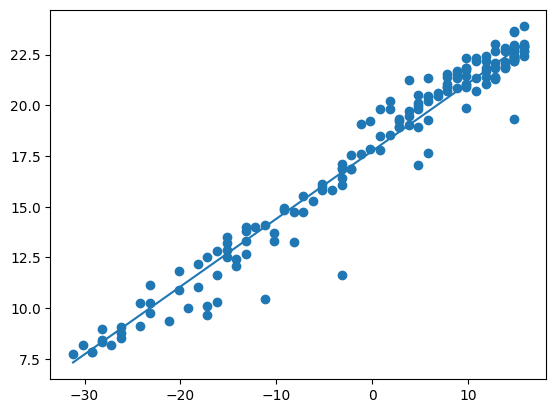

In [ ]:
#making predictions
# X = np.array(X).flatten()
P = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, P)
# print(P)

In [ ]:
#rounding and flattening predictions
# Pr = np.round(P).flatten() #-> for classification
# print(Pr)x

In [ ]:
#manually calculating prediction

#np.mean(P == Y_test) #for classification

#for regression
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
P2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(P, P2)

True

In [ ]:
#evaluate
#print("Evaluate output: ", model.evaluate(X_test, Y_test))

In [ ]:
##SAVING and LOADING A MODEL
model.save('test.h5')



In [ ]:
!ls -lh

total 28K
-rw-r--r-- 1 root root 2.3K Aug  4 13:27 moore.csv
drwxr-xr-x 1 root root 4.0K Aug  2 13:34 sample_data
-rw-r--r-- 1 root root  18K Aug  4 13:27 test.h5


In [ ]:
#loading (in Keras - load/save have bugs when Input() layer is not used explicitly)
model = tf.keras.models.load_model('test.h5')
print(model.layers)
# model.evaluate(X_test, Y_test)

In [ ]:
from google.colab import files
files.download('test.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###AUTOREGRESSIVE MODEL (Linear Regression Forecating Model)



In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

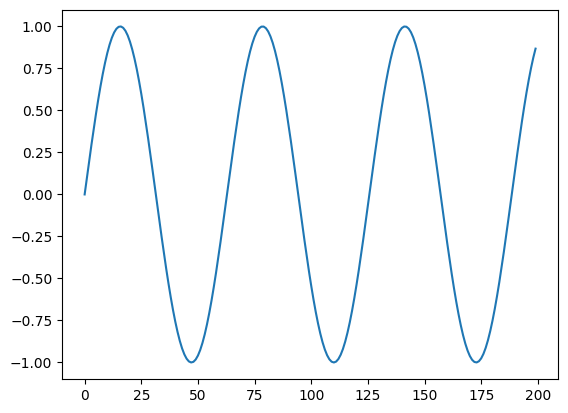

In [ ]:
#making the series
series = np.sin(0.1 * np.arange(200)) #+ np.random.rand(200)*0.1
plt.plot(series)
plt.show()

In [ ]:
#building dataset
# final target index: len(series) - 1
T = 10 # we are using 10 previous time stamps
X = []
Y = []
for time in range(len(series) - T):
  x = series[time : time + T]
  X.append(x)
  y = series[time + T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print('X shape: ', X.shape,'\n', 'Y.shape : ', Y.shape)



X shape:  (190, 10) 
 Y.shape :  (190,)


In [ ]:
# AR Model
input = Input(shape=(T,))
output = Dense (1)(input)
model = Model(input, output)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

In [ ]:
#train RNN
r = model.fit(
    X[:-N//2], Y[:-N//2], # splitting data is important in forecasting - model test on first set and validates on the second set
    epochs = 80, validation_data = (X[-N//2 :], Y[-N//2 :]),
)



Epoch 1/80
3/3 [==============================] - 1s 80ms/step - loss: 0.4310 - val_loss: 0.2739
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1596 - val_loss: 0.1032
Epoch 3/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0896 - val_loss: 0.0226
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0228 - val_loss: 0.0391
Epoch 5/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0273 - val_loss: 0.0384
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0423 - val_loss: 0.0749
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0404 - val_loss: 0.0341
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0270 - val_loss: 0.0108
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 10/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0076 - val_loss: 0.0061
Epoch 11/80
3/3 [============

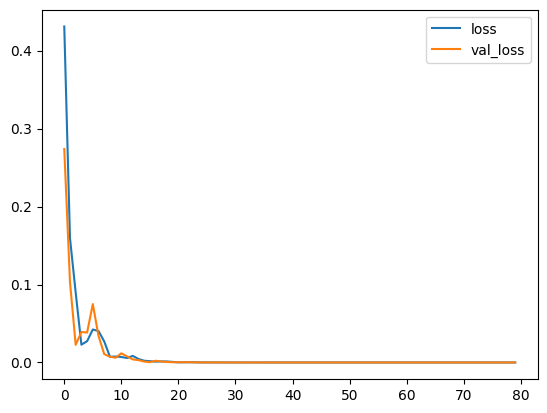

In [ ]:
#graph - loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

1/1 [==============================] - 0s 21ms/step


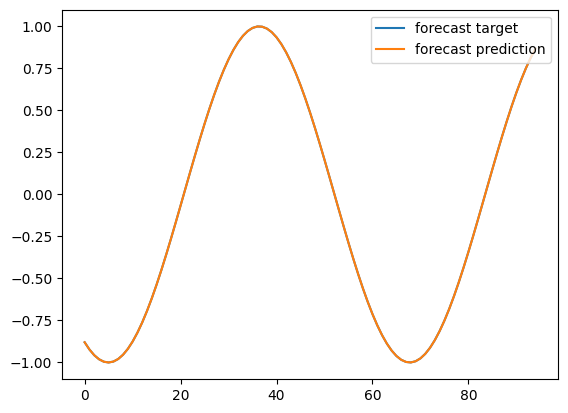

In [ ]:
#'Wrong' forecast using true targets
validation_targets =  Y[-N//2:]
validation_predictions = []

i = -N//2
while len(validation_predictions) < len(validation_targets):
  p = model.predict(X[i].reshape(1,-1))[0,0]  #1x1 array -> scalar, return NxK output - N is samples and K is output nodes
  i+=1

  validation_predictions.append(p)

plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

1/1 [==============================] - 0s 26ms/step


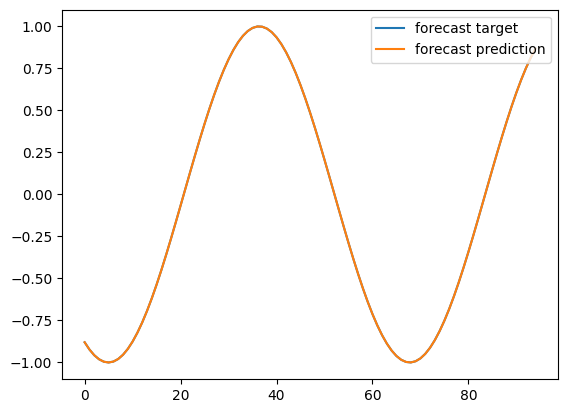

In [ ]:
#Forecast in correct way - very good for dataset with noise
validation_targets = Y[-N//2 :]
validation_predictions = []

#last train input
last_X = X[-N//2] #true input data cannot be used to train and predict future values , last_X is considered first input vector

while len(validation_predictions) < len(validation_targets):
  p = model.predict(last_X.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  #new input - shift all the values to the left and make a new input
  last_X = np.roll(last_X, -1)
  last_X[-1] = p

plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()
